**Assignment 3: MATH 425/625 Numerical Analysis**

**Ben Moss**

**Question 1**: Fitting natural cubic splines $S_j(x) = a_j + b_j(x - x_j) + c_j(x - x_j)^2 + d_j(x-x_j)^3$.

1. Simulate data from $y = cos(x)$ for $x$ in the interval $[-\pi/2, \pi/2]$. Use equally spaced $x$ values.
1. Set up the tri-diagonal coefficient matrix $A$ for natural cubic splines. 
1. Set up the $y$ vector and solve the system $Ac = y$ to obtain the $c$'s. Use scipy linalg to solve the system.
1. Solve for the other coefficients: $a$'s, $b$'s, and $d$'s.
1. Compare the fitted coefficients with values from the scipy builtin cubic splines function for the first three splines.
1. (Graduate Students) Plot the $cos(x)$ curve and the interpolate the values using a finner grid and your own spline code.

In [29]:
import numpy as np
from math import sqrt
from scipy import linalg
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

**Solution:** 1. Simulate data from $y = cos(x)$ for $x$ in the interval $[-\pi/2, \pi/2]$. Use equally spaced $x$ values.

(-2.0, 2.0)

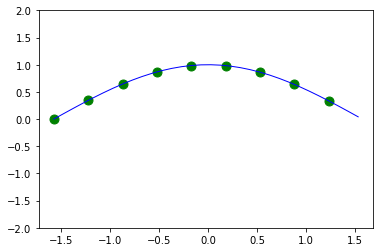

In [30]:
x_grid = np.arange(-np.pi/2., np.pi/2., 0.35)
y_grid = np.cos(x_grid)

x = np.arange(-np.pi/2, np.pi/2, 0.1)
y = np.cos(x)

fix, ax = plt.subplots()

ax.plot(x_grid, y_grid, ls = '', markersize = 9, marker = 'o', color = 'green')
ax.plot(x, y, ls = '-', lw = 1, color = 'blue')

ax.set_ylim([-2, 2])



**Solution**: 
2. Set up the tri-diagonal coefficient matrix $A$ for natural cubic splines. 

In [31]:
#xcos = [-np.pi/2, -np.pi/2 + np.pi/8, -np.pi/4, -np.pi/8, 0, np.pi/8, np.pi/4, np.pi/4 + np.pi/8, np.pi/2]
#ycos = [0, np.sin(np.pi/8), 1/sqrt(2), np.cos(np.pi/8), 1, np.cos(np.pi/8), 1/sqrt(2), np.sin(np.pi/8), 0]

In [32]:
#print(xcos)
#print(ycos)

In [33]:
h0 = x_grid[0] - x_grid[1]
h1 = x_grid[1] - x_grid[2]
h2 = x_grid[2] - x_grid[3]
h3 = x_grid[3] - x_grid[4]
h4 = x_grid[4] - x_grid[5]
h5 = x_grid[5] - x_grid[6]
h6 = x_grid[6] - x_grid[7]
h7 = x_grid[7] - x_grid[8]

print(h0)
print(h1)
print(h2)
print(h3)
print(h4)
print(h5)
print(h6)
print(h7)

-0.3500000000000001
-0.3500000000000001
-0.3500000000000001
-0.3500000000000001
-0.3500000000000001
-0.3500000000000001
-0.3500000000000001
-0.3500000000000001


In [34]:
Acos =  np.array([[1,0,0,0,0,0,0,0],
                  [h0, 2*(h0 + h1),h1,0,0,0,0,0],
                  [0,h1, 2 * (h1 + h2), h2,0,0,0,0],
                  [0,0,h2,2*(h2+h3),h3,0,0,0],
                  [0,0,0,h3,2*(h3+h4),h4,0,0],
                 [0,0,0,0,h4,2*(h4+h5),h6,0],
                 [0,0,0,0,0,h5,2*(h5+h6),h6],
                 [0,0,0,0,0,0,0,1]
                 ])

In [35]:
print(Acos)

[[ 1.    0.    0.    0.    0.    0.    0.    0.  ]
 [-0.35 -1.4  -0.35  0.    0.    0.    0.    0.  ]
 [ 0.   -0.35 -1.4  -0.35  0.    0.    0.    0.  ]
 [ 0.    0.   -0.35 -1.4  -0.35  0.    0.    0.  ]
 [ 0.    0.    0.   -0.35 -1.4  -0.35  0.    0.  ]
 [ 0.    0.    0.    0.   -0.35 -1.4  -0.35  0.  ]
 [ 0.    0.    0.    0.    0.   -0.35 -1.4  -0.35]
 [ 0.    0.    0.    0.    0.    0.    0.    1.  ]]


**Acos is our coefficient matrix.**

**Solution**: 
3. Set up the $y$ vector and solve the system $Ac = y$ to obtain the $c$'s. Use scipy linalg to solve the system.

In [36]:
Yvec = np.array([[0], 
                 [3*((1/h1)*(y_grid[2]-y_grid[1])-(1/h0)*(y_grid[1]-y_grid[0]))], 
                 [3*((1/h2)*(y_grid[3]-y_grid[2])-(1/h1)*(y_grid[2]-y_grid[1]))], 
                 [3*((1/h3)*(y_grid[4]-y_grid[3])-(1/h2)*(y_grid[3]-y_grid[2]))], 
                 [3*((1/h4)*(y_grid[5]-y_grid[4])-(1/h3)*(y_grid[4]-y_grid[3]))], 
                 [3*((1/h5)*(y_grid[6]-y_grid[5])-(1/h4)*(y_grid[5]-y_grid[4]))], 
                 [3*((1/h6)*(y_grid[7]-y_grid[6])-(1/h5)*(y_grid[6]-y_grid[5]))], 
                 [0]])
print(Yvec)

[[0.        ]
 [0.35638224]
 [0.6695515 ]
 [0.90153458]
 [1.02420246]
 [1.02268112]
 [0.89715501]
 [0.        ]]


In [37]:
cvalues = linalg.solve(Acos, Yvec)
print('c = \n', cvalues, '\n')

c = 
 [[ 0.        ]
 [-0.1730955 ]
 [-0.32585296]
 [-0.43649693]
 [-0.50397238]
 [-0.47390631]
 [-0.52234843]
 [ 0.        ]] 



In [38]:
print(cvalues[0])
print(cvalues[1])
print(cvalues[2])
print(cvalues[3])
print(cvalues[4])
print(cvalues[5])
print(cvalues[6])
print(cvalues[7])

[0.]
[-0.1730955]
[-0.32585296]
[-0.43649693]
[-0.50397238]
[-0.47390631]
[-0.52234843]
[0.]


These are the $c_j$ values.

**Solution**: 
4. Solve for the other coefficients: $a$'s, $b$'s, and $d$'s.

$a_j$'s are given by $$a_j = f(x_j).$$ This implies

In [39]:
a_0 = np.cos(x_grid[0])
a_1 = np.cos(x_grid[1])
a_2 = np.cos(x_grid[2])
a_3 = np.cos(x_grid[3])
a_4 = np.cos(x_grid[4])
a_5 = np.cos(x_grid[5])
a_6 = np.cos(x_grid[6])
a_7 = np.cos(x_grid[7])
a_8 = np.cos(x_grid[8])

print(a_0)
print(a_1)
print(a_2)
print(a_3)
print(a_4)
print(a_5)
print(a_6)
print(a_7)

6.123233995736766e-17
0.3428978074554515
0.6442176872376912
0.8674232255940171
0.9854497299884603
0.9839859468739368
0.8632093666488735
0.6377647021345033


These our the $a_j$ values.

We acquire $b_0$ from our formula in class
$$b_j = \dfrac{a_{j+1}-a_{j}}{h_{j}}-\dfrac{h_{j}(c_{j+1}+2c_{j})}{3}.$$
Which implies that 
$$b_{0}=\dfrac{a_{1}-a_{0}}{h_{0}}-\dfrac{h_{0}(c_{1}+2c_{0})}{3}.$$

From class we also derived that 
$$b_{j}=b_{j-1}+(c_{j}+c_{j-1})h_{j-1}.$$

In [40]:
b_0 = (a_1 - a_0)/h0 - (h0*(cvalues[1] + 2 * cvalues[0]))/3
b_1 = b_0 + (cvalues[1] + cvalues[0])*h0
b_2 = b_1 + (cvalues[2] + cvalues[1])*h1
b_3 = b_2 + (cvalues[3] + cvalues[2])*h2
b_4 = b_3 + (cvalues[4] + cvalues[3])*h3
b_5 = b_4 + (cvalues[5] + cvalues[4])*h4
b_6 = b_5 + (cvalues[6] + cvalues[5])*h5
b_7 = b_6 + (cvalues[7] + cvalues[6])*h6

print(b_0)
print(b_1)
print(b_2)
print(b_3)
print(b_4)
print(b_5)
print(b_6)
print(b_7)

[-0.9999025]
[-0.93931907]
[-0.76468711]
[-0.49786465]
[-0.16870039]
[0.17355715]
[0.52224631]
[0.70506826]


These our the $b_j$ values.

From class we know that $d_j$'s are given by 

$$d_j = \dfrac{c_{j+1}-c_{j}}{3h_j}.$$

In [41]:
d_0 = (cvalues[1]-cvalues[0])/(3 * h0)
d_1 = (cvalues[2]-cvalues[1])/(3 * h1)
d_2 = (cvalues[3]-cvalues[2])/(3 * h2)
d_3 = (cvalues[4]-cvalues[3])/(3 * h3)
d_4 = (cvalues[5]-cvalues[4])/(3 * h4)
d_5 = (cvalues[6]-cvalues[5])/(3 * h5)
d_6 = (cvalues[7]-cvalues[6])/(3 * h6)

print(d_0)
print(d_1)
print(d_2)
print(d_3)
print(d_4)
print(d_5)
print(d_6)

[0.16485286]
[0.1454833]
[0.10537521]
[0.06426233]
[-0.02863435]
[0.04613535]
[-0.49747469]


These are the $d_j$ values. 

**Solution**: 
5. Compare the fitted coefficients with values from the scipy builtin cubic splines function for the first three splines.

In [42]:
cs = CubicSpline(x_grid, y_grid, bc_type = 'natural')

# S1 Polynomial coefficients
a0 = cs.c.item(3,0)
b0 = cs.c.item(2,0)
c0 = cs.c.item(1,0)
d0 = cs.c.item(0,0)

# S2 Polynomial coefficients
a1 = cs.c.item(3,1)
b1 = cs.c.item(2,1)
c1 = cs.c.item(1,1)
d1 = cs.c.item(0,1)

# S3 Polynomial coefficients
a2 = cs.c.item(3,2)
b2 = cs.c.item(2,2)
c2 = cs.c.item(1,2)
d2 = cs.c.item(0,2)

# Print polynomial equations for different x regions
print('S0(0<=x<=1) = ', a0, ' + ', b0, '(x-0) + ', c0, '(x-0)^2  + ', d0, '(x-0)^3')
print('S1(1< x<=2) = ', a1, ' + ', b1, '(x-1) + ', c1, '(x-1)^2  + ', d1, '(x-1)^3')
print('S2(2< x<=3) = ', a2, ' + ', b2, '(x-2) + ', c2, '(x-2)^2  + ', d2, '(x-2)^3')

S0(0<=x<=1) =  6.123233995736766e-17  +  0.9999172246068342 (x-0) +  0.0 (x-0)^2  +  -0.1649730882085268 (x-0)^3
S1(1< x<=2) =  0.3428978074554515  +  0.9392896146902006 (x-1) +  -0.17322174261895476 (x-1)^2  +  -0.1448821431722118 (x-1)^3
S2(2< x<=3) =  0.6442176872376912  +  0.7647902072411444 (x-2) +  -0.32534799294977657 (x-2)^2  +  -0.10765959280996192 (x-2)^3


In [43]:
a0_diff = np.abs(a_0 - a0)
a1_diff = np.abs(a_1 - a1)
a2_diff = np.abs(a_2 - a2)

print('a_j value differences:')
print(a0_diff)
print(a1_diff)
print(a2_diff)

b0_diff = np.abs(b_0 - b0)
b1_diff = np.abs(b_1 - b1)
b2_diff = np.abs(b_2 - b2)

print('b_j value differences:')
print(b0_diff)
print(b1_diff)
print(b2_diff)

c0_diff = np.abs(cvalues[0] - c0)
c1_diff = np.abs(cvalues[1] - c1)
c2_diff = np.abs(cvalues[2] - c2)

print('c_j value differences:')
print(c0_diff)
print(c1_diff)
print(c2_diff)

d0_diff = np.abs(d_0 - d0)
d1_diff = np.abs(d_1 - d1)
d2_diff = np.abs(d_2 - d2)

print('d_j value differences:')
print(d0_diff)
print(d1_diff)
print(d2_diff)

a_j value differences:
0.0
0.0
0.0
b_j value differences:
[1.99981972]
[1.87860869]
[1.52947732]
c_j value differences:
[0.]
[0.00012624]
[0.00050497]
d_j value differences:
[0.32982595]
[0.29036544]
[0.21303481]


Differences for $a_{j}$'s are trivial, as is expected from our initial conditions; however, greatest differences are in $b_{j}$'s while $c_{j}$'s differ the least and $d_{j}$'s differ by less than $\frac{1}{3}$ among all $d_j$ coefficients. 

**Solution**: 
6. (Graduate Students) Plot the $cos(x)$ curve and the interpolate the values using a finner grid and your own spline code.

0.9789492534132666 c_0
0.003280665016858372 c_1
-0.41525217347704113 c_2
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
6.123233995736766e-17 a_0
0.0998334166468283 a_1
0.19866933079506144 a_2
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
-0.056434096561589625 b_0
-0.4002145680121334 b_1
-0.2560245400510694 b_2
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
0.9292081794251503 d_0
0.39860270332752323 d_1
-0.3926176779766148 d_2
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


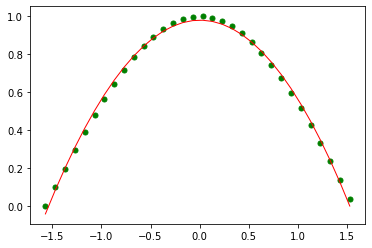

In [44]:
xnew = np.arange(-np.pi/2, np.pi/2, 0.1)
ynew = np.cos(xnew)

AR = np.ones([len(xnew), 4])
AR[:,0] = 1.0
AR[:,1] = xnew
AR[:,2] = xnew ** 2 
AR[:,3] = xnew ** 3

cnew = np.dot(linalg.pinv(AR), ynew)
print(cnew[0] , 'c_0')
print(cnew[1] , 'c_1')
print(cnew[2] , 'c_2')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

a0new = np.cos(xnew[0])
a1new = np.cos(xnew[1])
a2new = np.cos(xnew[2])

print(a0new , 'a_0')
print(a1new , 'a_1')
print(a2new , 'a_2')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

b0new = (a1new - a0new)/h0 - (h0*(cnew[1] + 2 * cnew[0]))/3
b1new = b0new + (cnew[1] + cnew[0])*h0
b2new = b1new + (cnew[2] + cnew[1])*h1

print(b0new , 'b_0')
print(b1new , 'b_1')
print(b2new , 'b_2')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

d0new = (cnew[1]-cnew[0])/(3 * h0)
d1new = (cnew[2]-cnew[1])/(3 * h1)
d2new = (cnew[3]-cnew[2])/(3 * h2)

print(d0new , 'd_0')
print(d1new , 'd_1')
print(d2new , 'd_2')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

p_hat = lambda xnew: np.array([cnew[i] * xnew ** i for i in range(AR.shape[1])]).sum()

x_gridnew = np.arange(-np.pi/2, np.pi/2, 0.1)
y_hat = [p_hat(x0) for x0 in x_gridnew]

fig, hx = plt.subplots()

hx.plot(xnew, ynew, ls = '', markersize = 5, marker = 'o', color = 'green')
hx.plot(x_gridnew, y_hat, ls = '-', lw = 1, color = 'red')